# 引入套件

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# titanic 資料視覺化

## 讀取資料

In [ ]:
data = pd.read_csv('titanic_data/train.csv')
data

## 先簡單處理一下資料

In [10]:
# 將 Age 的空值補 Age 的平均數
data['Age'].fillna(data['Age'].median(), inplace = True)

# 將 Embarked 的空值補 Embarked 的眾數
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

# 將 Fare 的空值補 Fare 的中位數
data['Fare'].fillna(data['Fare'].median(), inplace = True)
    
# 新增 FamilySize 欄位，代表家人總數
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 新增 IsAlone 欄位，代表是不是自己一個人
data['IsAlone'] = 1
data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0 

# 新增 FareBin 欄位，把 Fare 分成 4 個區間
data['FareBin'] = pd.qcut(data['Fare'], 4)

# 新增 AgeBin 欄位，把 Age 分成 5 個區間
data['AgeBin'] = pd.cut(data['Age'].astype(int), 5)

# 丟掉 'PassengerId','Cabin', 'Ticket', 'Name' 這幾個欄位
drop_column = ['PassengerId','Cabin', 'Ticket', 'Name']
data.drop(drop_column, axis=1, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    object  
 8   FamilySize  891 non-null    int64   
 9   IsAlone     891 non-null    int64   
 10  FareBin     891 non-null    category
 11  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 71.9+ KB


## 開始作圖

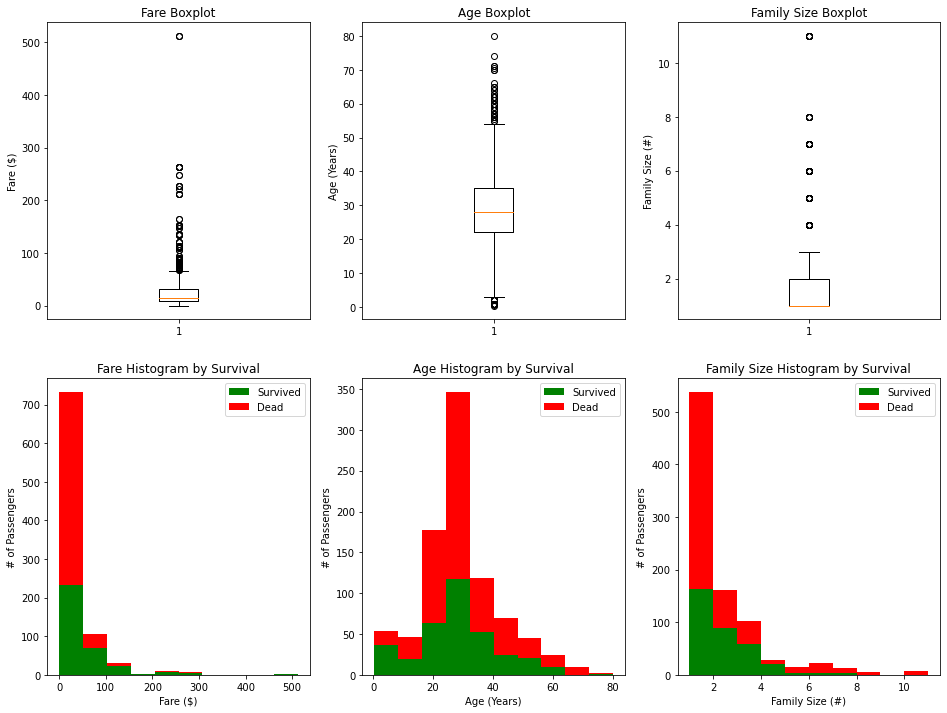

In [11]:
# 設定作圖大小
plt.figure(figsize=[16,12])

# 設定要在哪張子圖作圖，以 231 為例，就是要在 2 個 row，3 個 column 的子圖裡，作圖在第 1 張上
plt.subplot(231)
plt.boxplot(x=data['Fare'])
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data['Age'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data['FamilySize'])
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

# hist 可以傳一個 list 給他，他就會把 list 裡的每個元素用不同的顏色表示在直方圖上
plt.subplot(234)
plt.hist(x = [data.loc[data['Survived'] == 1, 'Fare'], data.loc[data['Survived'] == 0, 'Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data.loc[data['Survived'] == 1, 'Age'], data.loc[data['Survived'] == 0, 'Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data.loc[data['Survived'] == 1, 'FamilySize'], data.loc[data['Survived'] == 0, 'FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.show()

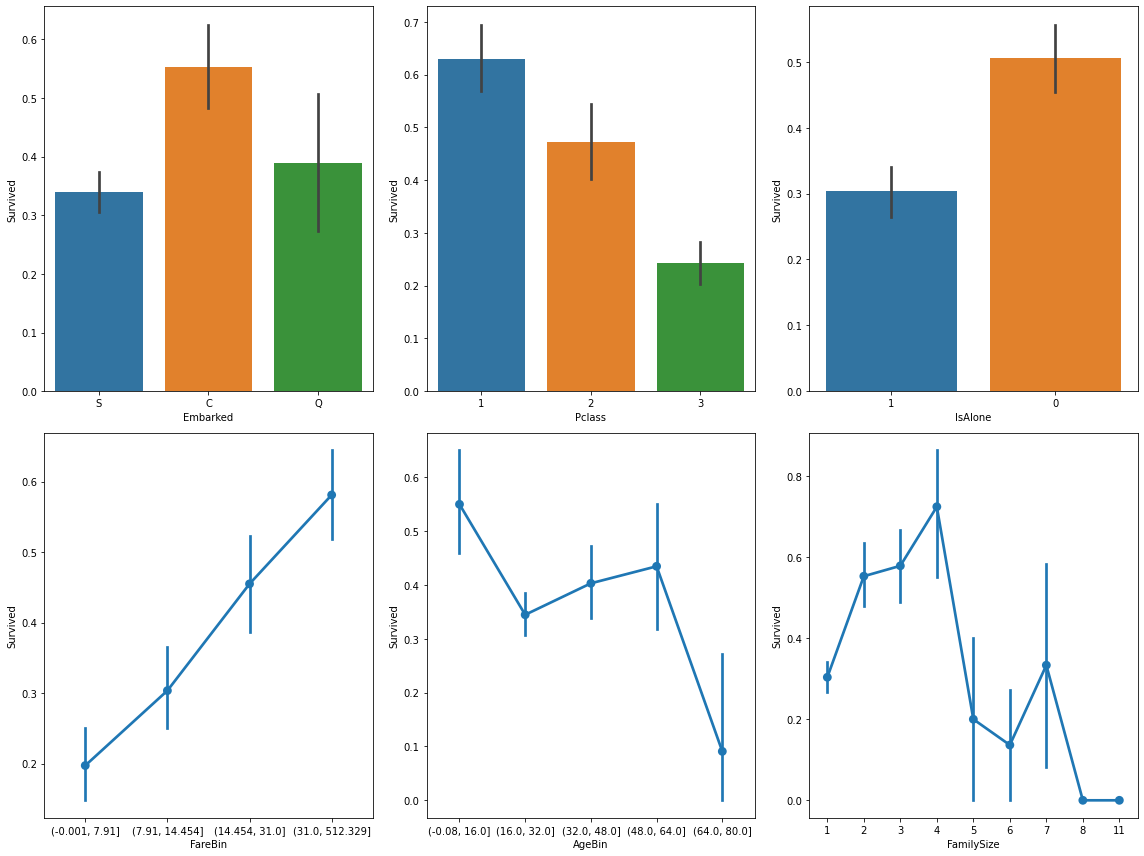

In [12]:
# 可以用 matplotlib 做出多張子圖，再用 seaborn 畫在這些子圖上
fig, axis = plt.subplots(2, 3,figsize=(16,12))

# ax 傳進上面做出的子圖，axis[0,0] 就代表要畫在第 0 個 row，第 0 個 column 這張子圖上
sns.barplot(x = 'Embarked', y = 'Survived', data=data, ax = axis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data, ax = axis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data, ax = axis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data, ax = axis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data, ax = axis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data, ax = axis[1,2])

plt.tight_layout()
plt.show()

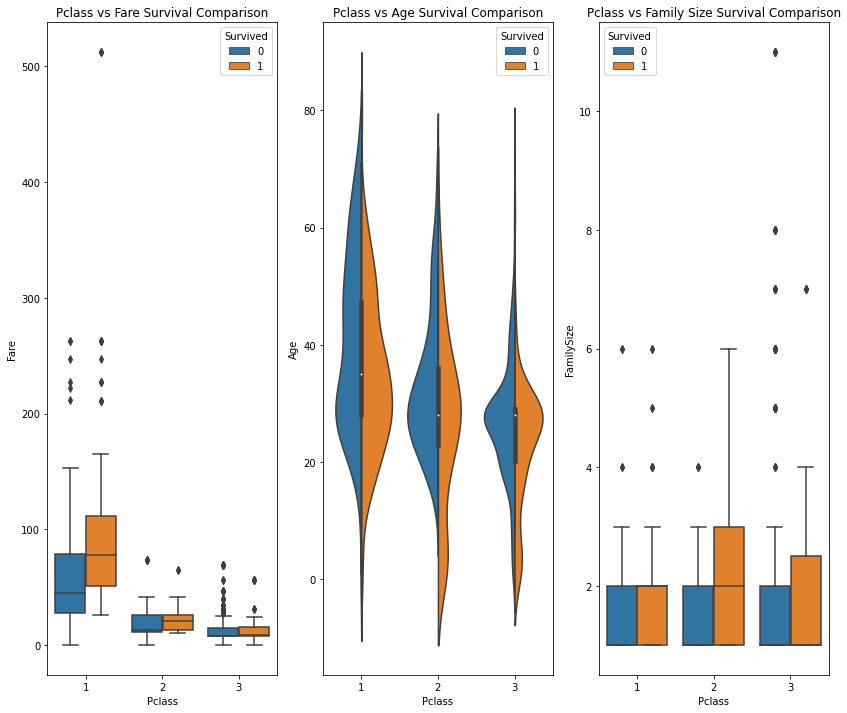

In [13]:
# 如果畫的子圖只有 1 個 row 的時候，回傳的 axis 會是 1 維陣列
fig, axis = plt.subplots(1,3,figsize=(14,12))

# 因為 axis 是一維陣列，要畫在第一張圖上不能寫 axis[0, 0]，要寫 axis[0]
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data, ax = axis[0])
axis[0].set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data, split = True, ax = axis[1])
axis[1].set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data, ax = axis[2])
axis[2].set_title('Pclass vs Family Size Survival Comparison')

plt.show()

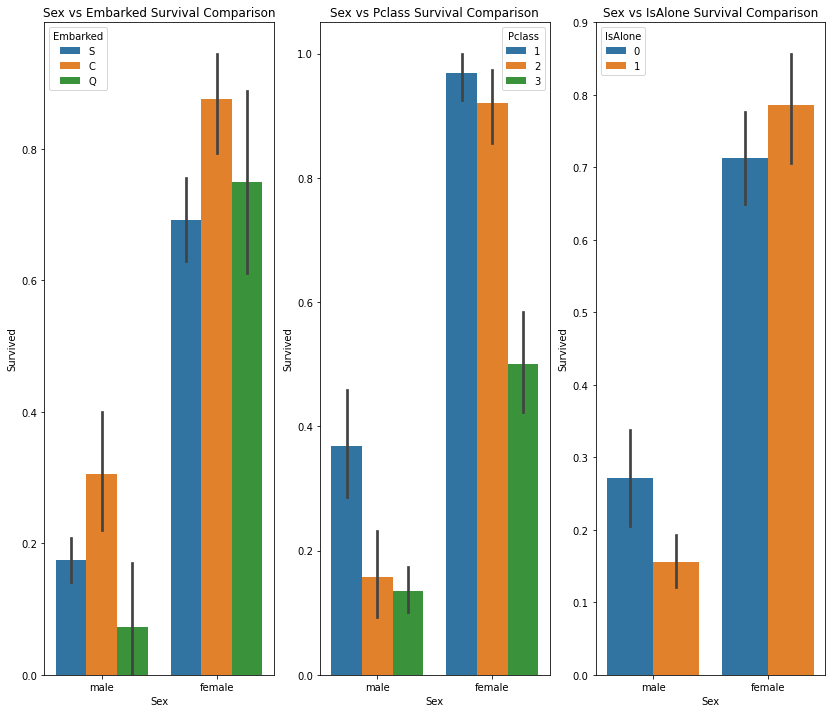

In [14]:
fig, axis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data, ax = axis[0])
axis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data, ax  = axis[1])
axis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data, ax  = axis[2])
axis[2].set_title('Sex vs IsAlone Survival Comparison')
plt.show()

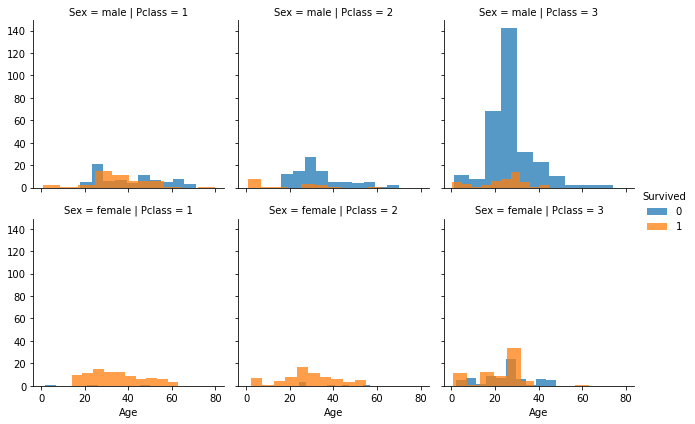

In [15]:
# 用 FacetGrid 比較各個群組下的狀況，以這行為例，同一個 row 會是同一個性別，同一個 column 下會是同一個 Pclass，顏色則代表存活的人數
h = sns.FacetGrid(data, row = 'Sex', col = 'Pclass', hue = 'Survived')

# 用 map 來指定要畫哪種圖，以這行為例，就是畫 Age 的直方圖，alpha 是控制透明度
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()
plt.show()

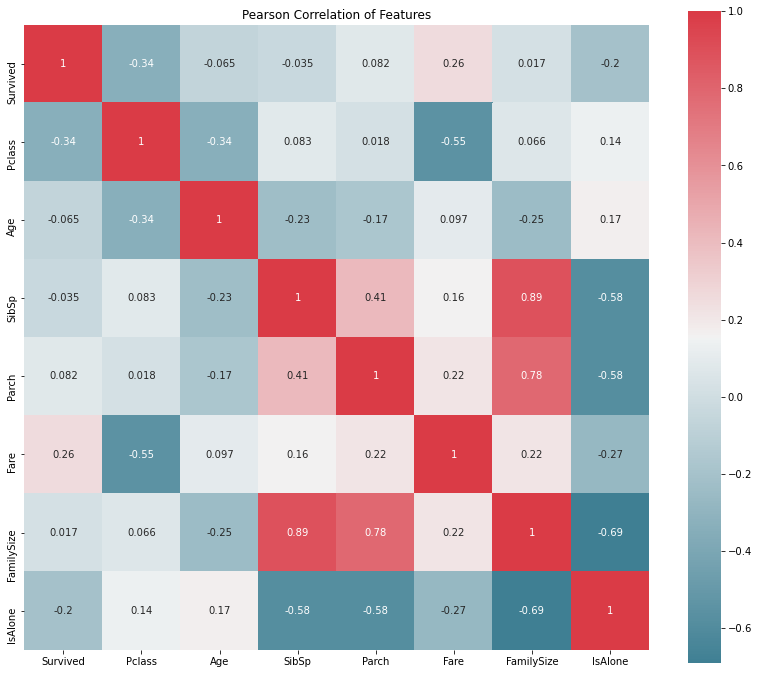

In [35]:
_ , ax = plt.subplots(figsize =(14, 12))

# colormap 可以想成是顏色的區間，像下面這個是從深藍到深紅
colormap = sns.diverging_palette(220, 10, as_cmap = True)

# corr 可以算出各 feature 間的相關性數值
# 用 heatmap 可以把數值用顏色來呈現，這種圖我們稱為熱力圖，用這種方式來看 feature 間的相關性會比較方便
sns.heatmap(data.corr(), cmap = colormap, square=True, ax=ax, annot=True)

plt.title('Pearson Correlation of Features')
plt.show()